# 3. Advanced Pandas

In [1]:
import pandas as pd
import numpy as np

In [2]:
import warnings 
warnings.filterwarnings('ignore')

# 3.1 Avoid These Practices!

### 3.1.1 Chain Indexing

In [3]:
df = pd.DataFrame({'Day':[1,2,3,4,5,6,7],
                   'Patients':[43,34,65,56,29,76,59],
                   'Meds_Given':[40,28,54,20,19,66,38]})
df

,Day,Meds_Given,Patients
0,1,40,43
1,2,28,34
2,3,54,65
3,4,20,56
4,5,19,29
5,6,66,76
6,7,38,59


In [4]:
'''NOTE: Nothing happened even though we assigned values.'''
df[df['Day'] <= 3]['Meds_Given'] = df[df['Day'] <= 3 ]['Meds_Given'] / 10
df

,Day,Meds_Given,Patients
0,1,40,43
1,2,28,34
2,3,54,65
3,4,20,56
4,5,19,29
5,6,66,76
6,7,38,59


In [5]:
'''Use loc and iloc to explicitly call a copy rather than a view'''
df.loc[df['Day'] <= 3, 'Meds_Given'] = df.loc[df['Day'] <= 3, 'Meds_Given'] / 10
df

,Day,Meds_Given,Patients
0,1,4.0,43
1,2,2.8,34
2,3,5.4,65
3,4,20.0,56
4,5,19.0,29
5,6,66.0,76
6,7,38.0,59


### 3.1.2 Unintentionally Changing Original DataFrame

In [6]:
df = pd.DataFrame({'Day':[1,2,3,4,5,6,7],
                   'Patients':[43,34,65,56,29,76,59],
                   'Meds_Given':[40,28,54,20,19,66,38]})
df

,Day,Meds_Given,Patients
0,1,40,43
1,2,28,34
2,3,54,65
3,4,20,56
4,5,19,29
5,6,66,76
6,7,38,59


In [7]:
temp = df.loc[3:6]
temp

,Day,Meds_Given,Patients
3,4,20,56
4,5,19,29
5,6,66,76
6,7,38,59


In [8]:
temp['Meds_Given'] = temp['Meds_Given']*2
temp

,Day,Meds_Given,Patients
3,4,40,56
4,5,38,29
5,6,132,76
6,7,76,59


In [9]:
df

,Day,Meds_Given,Patients
0,1,40,43
1,2,28,34
2,3,54,65
3,4,40,56
4,5,38,29
5,6,132,76
6,7,76,59


In [11]:
'''Explicitly calling copy onto a dataframe will save you headaches.'''
df = pd.DataFrame({'Day':[1,2,3,4,5,6,7],
                   'Patients':[43,34,65,56,29,76,59],
                   'Meds_Given':[40,28,54,20,19,66,38]})

temp = df.loc[3:6].copy()
temp

,Day,Meds_Given,Patients
3,4,20,56
4,5,19,29
5,6,66,76
6,7,38,59


In [12]:
temp['Meds_Given'] = temp['Meds_Given']*2
temp

,Day,Meds_Given,Patients
3,4,40,56
4,5,38,29
5,6,132,76
6,7,76,59


In [13]:
df

,Day,Meds_Given,Patients
0,1,40,43
1,2,28,34
2,3,54,65
3,4,20,56
4,5,19,29
5,6,66,76
6,7,38,59


### 3.1.3 Using inplace When Not Needed.

In [24]:
'''When you just need one thing done for a DataFrame.'''
df = pd.DataFrame({'Day':[1,2,3,4,5,6,7],
                   'Patients':[43,34,65,56,29,76,59],
                   'Meds_Given':[40,28,54,20,19,66,38]})

df.set_index('Day',inplace = True)    # df = df.set_index('Day')
df

,Meds_Given,Patients
Day,,
1,40,43
2,28,34
3,54,65
4,20,56
5,19,29
6,66,76
7,38,59


In [25]:
'''Where you might need more. Generally, I don't use inplace because of method chaining'''
temp = df.copy()
type(temp.reset_index(inplace = True))

NoneType

### 3.1.4 Assigning Data Using dataframe.col_name

In [26]:
df

,Meds_Given,Patients
Day,,
1,40,43
2,28,34
3,54,65
4,20,56
5,19,29
6,66,76
7,38,59


In [27]:
df['New'] = pd.Series([0,1,2,3,4,5,6,7])
df

,Meds_Given,Patients,New
Day,,,
1,40,43,1
2,28,34,2
3,54,65,3
4,20,56,4
5,19,29,5
6,66,76,6
7,38,59,7


In [28]:
df.New = [11,12,13,14,15,16,17]
df[df.New > 14]

,Meds_Given,Patients,New
Day,,,
5,19,29,15
6,66,76,16
7,38,59,17


In [29]:
df = df.drop('New', axis = 1)
df

,Meds_Given,Patients
Day,,
1,40,43
2,28,34
3,54,65
4,20,56
5,19,29
6,66,76
7,38,59


# 3.1 Summary

<b>1. Chain Indexing:</b>    
This is a bad practice because you don't want a view when you want a copy. Then when you want a copy, you actually get a view.  
The best idea is just to be explicit and use loc and iloc methods.

<b>2. Changing Original DataFrame:  </b>  
When you want a new seperate dataframe that is subsetted from another dataframe, use the copy method so you don't make a mistake in data cleaning and collection.  
EX: Boolean querying seems to return a copy already.

<b>3. Inplace:</b>  
This is more of suggestion since you want to be able to chain methods and write what the creators coined, pandorable code. If you assign after using inplace, it will return nothing. 

<b>4. Dataframe.col_name Assignments: </b>  
This is because its unclear whether you are attaching an attribute of the dataframe or changing the data of the column itself. Its best to be explicit here.

# 3.2 Try Doing These When You Can

## Pandorable

In [37]:
'''Idiomatic Pandas: Pandorable'''
df = pd.DataFrame({'Month':[7,8,9,10,11,12],
                   'Pop_Pandas 2016'   : [43,44,49,52,50,67],
                   'Pop_Pythons 2016'   : [42,45,50,51,60,67],
                   'Pop_Anacondas 2016' : [41,46,48,50,63,67],
                   'Pop_Rabbits 2016'   : [40,47,47,53,61,67],
                   'Pop_Foxes 2016'     : [39,48,46,55,62,67],
                   'Pop_Giraffes 2016'  : [38,49,47,54,59,67]})
df

,Month,Pop_Anacondas 2016,Pop_Foxes 2016,Pop_Giraffes 2016,Pop_Pandas 2016,Pop_Pythons 2016,Pop_Rabbits 2016
0,7,41,39,38,43,42,40
1,8,46,48,49,44,45,47
2,9,48,46,47,49,50,47
3,10,50,55,54,52,51,53
4,11,63,62,59,50,60,61
5,12,67,67,67,67,67,67


### 3.2.1 Method Chaining

In [38]:
def min_max(row):
    data = row[['Pop_Anacondas 2016',
                'Pop_Foxes 2016',
                'Pop_Giraffes 2016',
                'Pop_Pandas 2016',
                'Pop_Pythons 2016',
                'Pop_Rabbits 2016',]]
    
    row['Min'] = np.min(data)
    row['Max'] = np.max(data)
    
    return row

In [39]:
'''After all the method chaining, we can even get a boolean mask on the DataFrame.'''
(df.reset_index()
   .set_index('Month')
   .drop(['Pop_Anacondas 2016','Pop_Foxes 2016'], axis = 1)
   .loc[9:12]
   .apply(min_max, axis = 1))

,index,Pop_Giraffes 2016,Pop_Pandas 2016,Pop_Pythons 2016,Pop_Rabbits 2016,Min,Max
Month,,,,,,,
9,2.0,47.0,49.0,50.0,47.0,47.0,50.0
10,3.0,54.0,52.0,51.0,53.0,51.0,54.0
11,4.0,59.0,50.0,60.0,61.0,50.0,61.0
12,5.0,67.0,67.0,67.0,67.0,67.0,67.0


### 3.2.2 Using apply

In [40]:
'''Set Index to Month, axis = 1 applies to all rows'''
(df.set_index('Month')
   .apply(min_max, axis = 1))

,Pop_Anacondas 2016,Pop_Foxes 2016,Pop_Giraffes 2016,Pop_Pandas 2016,Pop_Pythons 2016,Pop_Rabbits 2016,Min,Max
Month,,,,,,,,
7,41,39,38,43,42,40,38,43
8,46,48,49,44,45,47,44,49
9,48,46,47,49,50,47,46,50
10,50,55,54,52,51,53,50,55
11,63,62,59,50,60,61,50,63
12,67,67,67,67,67,67,67,67


### 3.2.3 Lambdas

In [41]:
'''Instead of defining a function like I did up there, we can use a throwaway function, lambda'''
(df[['Month','Pop_Anacondas 2016','Pop_Foxes 2016']].set_index('Month')
                                                    .apply(lambda x: x * 2)
                                                    .loc[9:15])

,Pop_Anacondas 2016,Pop_Foxes 2016
Month,,
9,96,92
10,100,110
11,126,124
12,134,134


In [42]:
'''Using If/Else in Lambdas'''
df['Pop_Anacondas Less Than 50'] = df['Pop_Anacondas 2016'].apply(lambda x: x if x > 50 else 'Less than 50')
df

,Month,Pop_Anacondas 2016,Pop_Foxes 2016,Pop_Giraffes 2016,Pop_Pandas 2016,Pop_Pythons 2016,Pop_Rabbits 2016,Pop_Anacondas Less Than 50
0,7,41,39,38,43,42,40,Less than 50
1,8,46,48,49,44,45,47,Less than 50
2,9,48,46,47,49,50,47,Less than 50
3,10,50,55,54,52,51,53,Less than 50
4,11,63,62,59,50,60,61,63
5,12,67,67,67,67,67,67,67


In [43]:
df.drop('Pop_Anacondas Less Than 50', axis = 1, inplace = True)
df

,Month,Pop_Anacondas 2016,Pop_Foxes 2016,Pop_Giraffes 2016,Pop_Pandas 2016,Pop_Pythons 2016,Pop_Rabbits 2016
0,7,41,39,38,43,42,40
1,8,46,48,49,44,45,47
2,9,48,46,47,49,50,47
3,10,50,55,54,52,51,53
4,11,63,62,59,50,60,61
5,12,67,67,67,67,67,67


### 3.2.4 Groupby Method

In [47]:
df['Year'] = [1,1,1,2,2,2]
df['Season'] = ['Summer','Fall','Fall','Fall','Fall','Winter']
df

,Month,Pop_Anacondas 2016,Pop_Foxes 2016,Pop_Giraffes 2016,Pop_Pandas 2016,Pop_Pythons 2016,Pop_Rabbits 2016,Year,Season
0,7,41,39,38,43,42,40,1,Summer
1,8,46,48,49,44,45,47,1,Fall
2,9,48,46,47,49,50,47,1,Fall
3,10,50,55,54,52,51,53,2,Fall
4,11,63,62,59,50,60,61,2,Fall
5,12,67,67,67,67,67,67,2,Winter


In [27]:
'''Combines data for the year and aggregates the data by summing.'''
df.groupby('Year')['Pop_Anacondas 2016'].sum()

Year
1    135
2    180
Name: Pop_Anacondas 2016, dtype: int64

In [48]:
'''Explicitly using the agg method is a better practice.'''
df.groupby('Year')['Pop_Anacondas 2016'].agg({'Pop_Anacondas 2016' : 'sum'})

,Pop_Anacondas 2016
Year,
1,135
2,180


In [50]:
'''Multi-Indexing through groupby. Most useful in economic data and finance.'''
df = df.groupby(['Year','Season','Month'])['Pop_Anacondas 2016'].agg({'Pop_Anacondas 2016' : 'sum'})
df

Pop_Anacondas 2016
Year Season Month                    
1    Fall   8                      46
            9                      48
     Summer 7                      41
2    Fall   10                     50
            11                     63
     Winter 12                     67

In [65]:
df = df.reset_index()

In [71]:
temp = df.groupby(['Season','Year','Month']).agg({'Pop_Anacondas 2016' : 'sum'})

In [72]:
temp.loc['Fall']

Pop_Anacondas 2016
Year Month                    
1    8                      46
     9                      48
2    10                     50
     11                     63

In [79]:
temp.isnull().sum()

Pop_Anacondas 2016    0
dtype: int64

In [80]:
import matplotlib.pyplot as plt

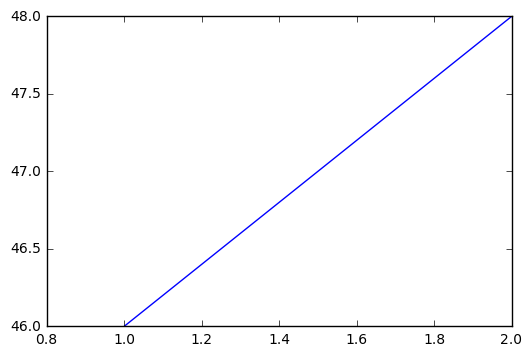

In [84]:
plt.plot([1,2],temp.loc['Fall',1])
plt.show()

# Summary 3.2

<b>1. Method Chaining: </b>  
This makes for readable code. If you were to do things seperately and one at a time, you would notice that it's actually faster. 

<b>2. Using apply: </b> 
Apply is very useful because it does an operation or a user defined function to a dataframe. There are prebuilt methods like sum, mean and std, but you want the flexibility of other functions when you can instead of writing a function or loop to change the dataframe.

<b>3. Lambdas: </b>  
Lambdas are special functions that are used when its not necessary to make a long user defined function.

<b>4. Groupby Method:</b>  
Groupby is very useful in combining data and multi-indexing your data. Using the agg method to aggregate your data will be useful when its not just basic ufuncs: max, min, sum, mean and std.  
Ex. You might need to use the most frequent or change datetimes.